In [ ]:
Deep Neural Network (DNN) with:
Three hidden layers with ReLU activation.
Dropout layers to prevent overfitting.
Polynomial Features (Degree = 2):
Used to create interaction terms and higher-degree features before passing them to the deep neural network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv(r"C:\Users\super\Downloads\environmental_data_with_near_real_pm25.csv")

In [8]:
print(df.isnull().sum())

Country                                    0
PM2.5 Concentration (µg/m³)               48
CO2 Emissions (metric tons per capita)    31
Air Pollution Index                        0
Water Quality Index                        0
dtype: int64


In [9]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [10]:
for column in df.columns:
    if df[column].dtype == float:  
        df[column].fillna(df[column].mean(), inplace=True)


scaler = MinMaxScaler()
numerical_columns = ['PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                     'Air Pollution Index', 'Water Quality Index']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  
0             0.273399  
1             0.590675  
2             0.912466  
3             0.206865  
4             0.621461  


In [2]:
data = pd.read_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv")
world_data = pd.read_csv("C:\\Users\\super\\Downloads\\world-data-2023_cleaned.csv")

In [3]:
columns_to_add = [
    'Country',  
    'Life expectancy',  
    'GDP', 
    'Out of pocket health expenditure',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Urban_population'  
]

In [4]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  Life expectancy           GDP  \
0             0.273399        64.500000  1.910135e+10   
1             0.590675        78.500000  1.527808e+10   
2             0.912466        76.700000  1.699882e+11   
3             0.206865        72.279679  3.154058e+09   
4             0.621461        60.80

In [5]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  Life expectancy           GDP  \
0             0.273399        64.500000  1.910135e+10   
1             0.590675        78.500000  1.527808e+10   
2             0.912466        76.700000  1.699882e+11   
3             0.206865        72.279679  3.154058e+09   
4             0.621461        60.80

Life expectancy                            1.000000
Gross tertiary education enrollment (%)    0.714553
CO2 Emissions (metric tons per capita)     0.448901
GDP                                        0.175355
Air Pollution Index                        0.094701
Urban_population                           0.070007
Population                                 0.008409
Water Quality Index                        0.005960
Out of pocket health expenditure          -0.317561
PM2.5 Concentration (µg/m³)               -0.384366
Name: Life expectancy, dtype: float64


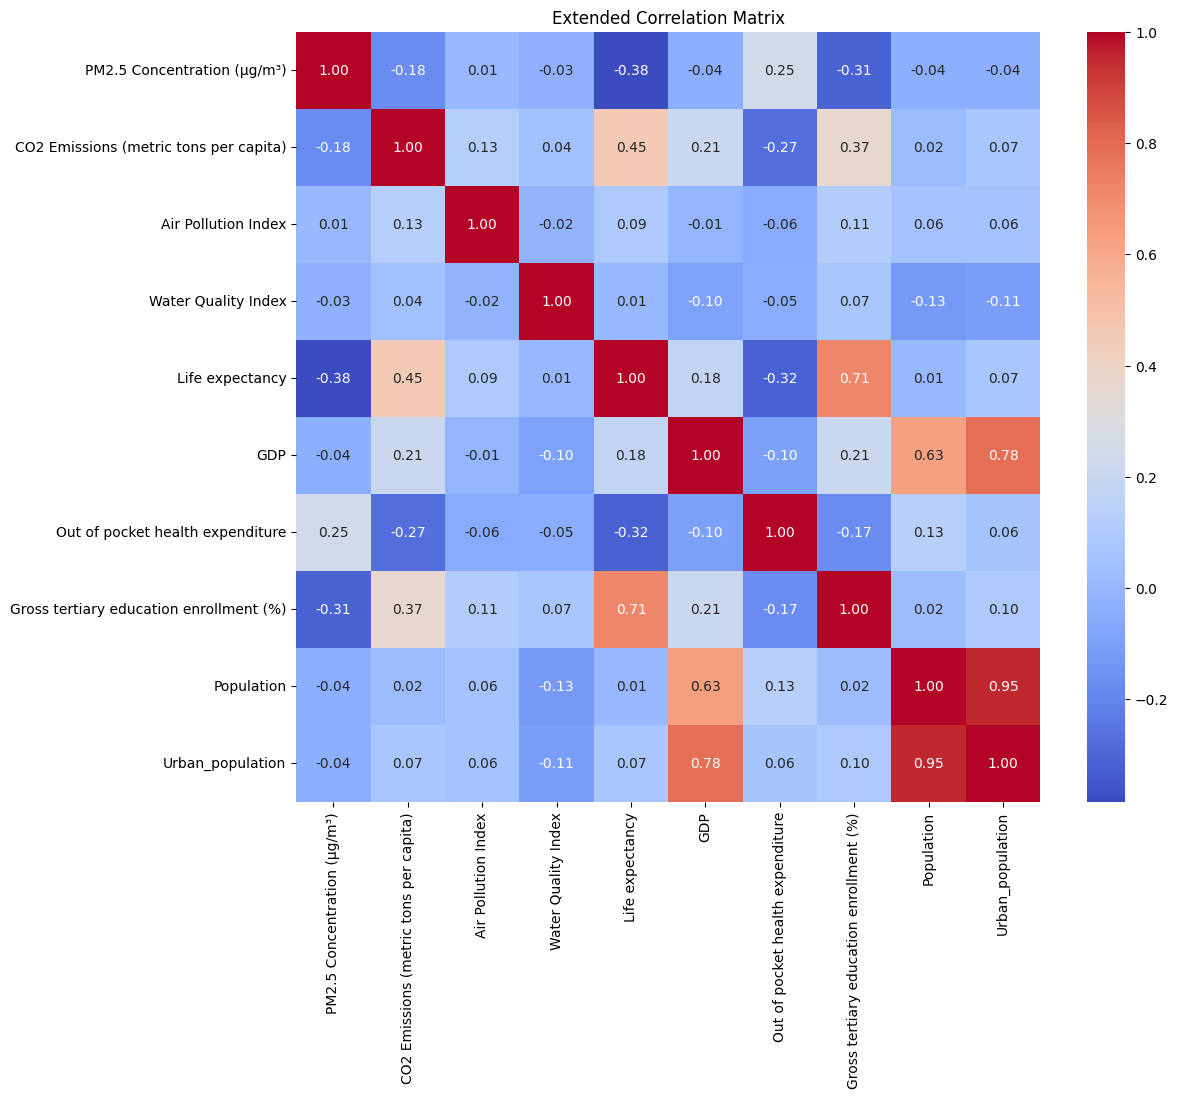

In [6]:
import seaborn as sns
numeric_data = merged_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Extended Correlation Matrix')
plt.show()

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error

X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_full, y_train_full)
X_test_selected = selector.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.4))  
model.add(Dense(128, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  
model.add(Dense(1)) 

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6, verbose=1)

history = model.fit(X_train_scaled, y_train_full, validation_data=(X_test_scaled, y_test), 
                    epochs=200, batch_size=32, verbose=1, callbacks=[early_stopping, lr_scheduler])

y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Deep Learning with Feature Engineering (Simplified) - RMSE: {rmse}, MAE: {mae}, R2: {r2}")

C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 4995.6260 - val_loss: 5296.4399 - learning_rate: 0.0010
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4966.0444 - val_loss: 5275.5508 - learning_rate: 0.0010
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4862.8340 - val_loss: 5252.9209 - learning_rate: 0.0010
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4689.4453 - val_loss: 5226.6113 - learning_rate: 0.0010
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4601.2959 - val_loss: 5195.4072 - learning_rate: 0.0010
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4487.2832 - val_loss: 5157.4648 - learning_rate: 0.0010
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4420.3525 - val_loss: 5112.1035 - learning_rate: 0.0010
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4217.0303 - val_loss: 5056.8804 - learning_rate: 0.0010
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4017.9958 - val_loss: 4987.64

In [8]:
from sklearn.model_selection import cross_val_predict, train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_full = y_train_full.reset_index(drop=True)

selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_full, y_train_full)
X_test_selected = selector.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mean_rmse, mean_mae, mean_r2 = [], [], []
for train_idx, test_idx in kf.split(X_train_scaled):
    X_train_k, X_test_k = X_train_scaled[train_idx], X_train_scaled[test_idx]
    y_train_k, y_test_k = y_train_full[train_idx], y_train_full[test_idx]

    model.fit(X_train_k, y_train_k, epochs=100, batch_size=32, verbose=0)

    y_pred_k = model.predict(X_test_k)
    mean_rmse.append(np.sqrt(mean_squared_error(y_test_k, y_pred_k)))
    mean_mae.append(mean_absolute_error(y_test_k, y_pred_k))
    mean_r2.append(r2_score(y_test_k, y_pred_k))

print(f"Mean CV RMSE: {np.mean(mean_rmse):.3f}")
print(f"Mean CV MAE: {np.mean(mean_mae):.3f}")
print(f"Mean CV R²: {np.mean(mean_r2):.3f}")

C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Mean CV RMSE: 5.452
Mean CV MAE: 4.153
Mean CV R²: 0.433


In [12]:
from scikeras.wrappers import KerasRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

def create_model():
    model = Sequential()
    model.add(Dense(256, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

keras_regressor = KerasRegressor(model=create_model, epochs=200, batch_size=32, verbose=0)

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

stacked_model = StackingRegressor(
    estimators=[
        ('neural_network', keras_regressor),
        ('gradient_boosting', GradientBoostingRegressor(n_estimators=100)),
        ('random_forest', RandomForestRegressor(n_estimators=100))
    ],
    final_estimator=LinearRegression()
)

stacked_model.fit(X_train_scaled, y_train_full)
y_pred_stacked = stacked_model.predict(X_test_scaled)

rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print(f"Stacked Model RMSE: {rmse_stacked:.3f}")

C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in th

C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Stacked Model RMSE: 3.413


In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

def create_model():
    model = Sequential()
    model.add(Dense(256, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

keras_regressor = KerasRegressor(model=create_model, epochs=200, batch_size=32, verbose=0)
gradient_boosting = GradientBoostingRegressor(n_estimators=100)
random_forest = RandomForestRegressor(n_estimators=100)

keras_regressor.fit(X_train_scaled, y_train_full)
gradient_boosting.fit(X_train_scaled, y_train_full)
random_forest.fit(X_train_scaled, y_train_full)

meta_features_train = np.column_stack([
    keras_regressor.predict(X_train_scaled),
    gradient_boosting.predict(X_train_scaled),
    random_forest.predict(X_train_scaled)
])

meta_features_test = np.column_stack([
    keras_regressor.predict(X_test_scaled),
    gradient_boosting.predict(X_test_scaled),
    random_forest.predict(X_test_scaled)
])

final_estimator = LinearRegression()
final_estimator.fit(meta_features_train, y_train_full)

y_pred_meta = final_estimator.predict(meta_features_test)

rmse_meta = np.sqrt(mean_squared_error(y_test, y_pred_meta))
print(f"Meta-Model RMSE: {rmse_meta:.3f}")

C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Meta-Model RMSE: 3.859


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


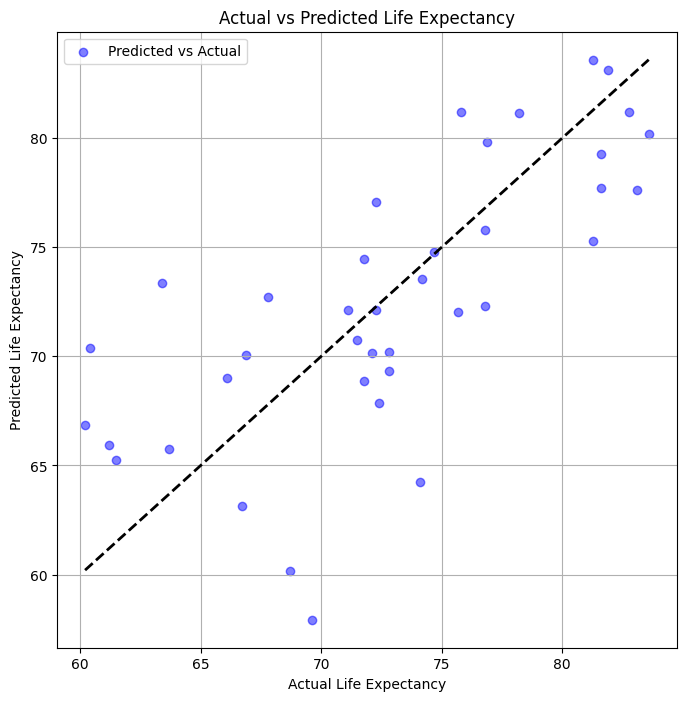

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled).flatten() 

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

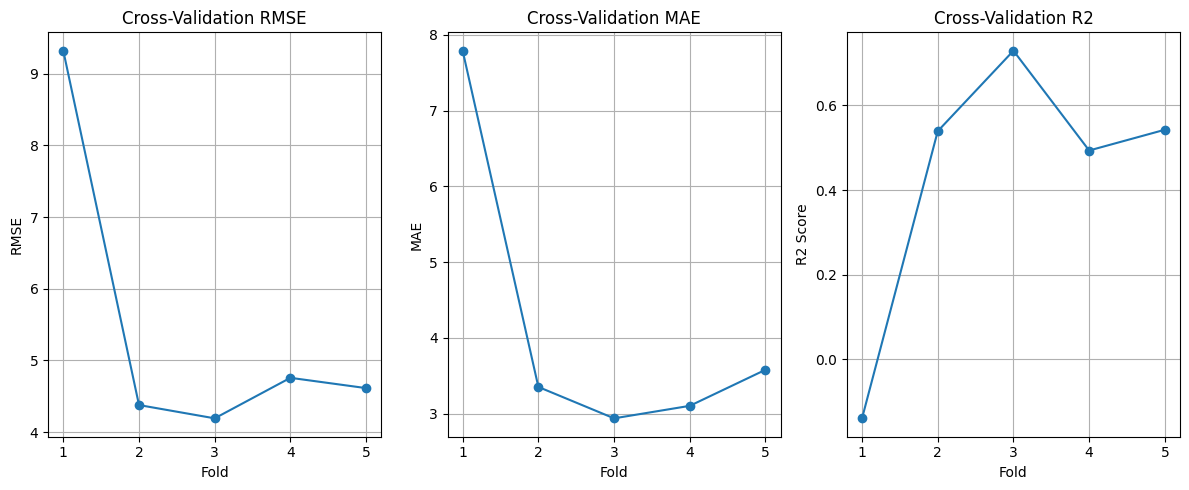

In [17]:
folds = list(range(1, 6))
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(folds, mean_rmse, marker='o', label='RMSE per Fold')
plt.title('Cross-Validation RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(folds, mean_mae, marker='o', label='MAE per Fold')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(folds, mean_r2, marker='o', label='R2 per Fold')
plt.title('Cross-Validation R2')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.grid(True)

plt.tight_layout()
plt.show()